In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 10))
np.set_printoptions(precision=4, threshold=15,suppress=True)

# 支持向量机 Support Vector Machine, SVM

支持向量机是指的一种机器学习的算法.  

SVM - Support Vector Machine ，俗称支持向量机，是一种 supervised learning （监督学习）算法，属于 classification （分类）的范畴.其中Machine指的是Classification Machine, 指分类器.

## 1. 间隔与支持向量
给定训练样本集
$$D = \{(x_1, y_1), (x_1, y_1), \cdots, (x_m, y_m)\}, y_i \in \{-1, +1\}\$$
分类学习最基本的想法就是基于训练样本集D在样本空间找到一个划分**超平面**, 将不同的类别分开.  
<img src='../img/划分超平面.png'></img>
>`超平面 hyperplane`: 如果数据都在一条轴上,那么**分隔超平面 separating hyperplane**就是轴上的一个点.如果数据点在二维平面上,此时的分隔超平面就是一条直线.如果所给的数据集是三维的，那么此时用来分隔数据的就是一个平面.更高维度的情况可以依次类推, N维空间的数据集需要一个N-1维的对象进行划分,该对象就被称为**超平面**.


能将训练样本划分开的超平面可能有很多,如何进行选取呢?直观上会选取两类训练样本"**正中间**"的划分超平面, 因为该划分超平面对训练样本局部扰动的"容忍"性最好.  

样本空间中, 划分超平面可以用线性方程进行描述:

$$ w^Tx+b = 0 \tag {1}$$
其中$w = \{w_1;w_2;\cdots;w_d\}$为**法向量**, 决定了超平面的方向, b为位移项,决定了超平面与原点之间的距离, 故而可以用(w, b)来描述这个超平面. 那么样本空间任意点x到超平面(w, b)的距离可写为:
$$r = \frac {|w^Tx+b|}{||w||} \tag {2}$$
比如点到直线的距离公式:
$$d = \frac {|Ax_0 + By_0 + C|}{\sqrt {A^2+B^2}}$$
> `范数 norm`:用来衡量向量的大小的函数.形式上, $L^p$范数定义如下:
    $$||z||_p = \left(\sum_{i=1}^{n}|z_i|^p\right)^{\frac 1 p} \tag {3}$$
当p=2时.$L^2$范数(向量的2范数)成为**欧几里得范数(Euclidean norm)**,它表示从原点出发到向量z的欧几里得距离,经常忽略下标,直接写成||z||.平方$L^2$范数也经常被用来衡量向量大小, 可以通过简单的点积$z^T\cdot z$求得.例如,向量z=\[3, 4\], 其长度为$\sqrt {3^2+4^2}
= 5$  
$L^1$范数也叫**曼哈顿距离(Manhattan distance)** 向量z的L1范数为3+4=7

假设超平面(w, b)能将训练样本正确分类, 即对$(x_i, y_i) \in D$, 若$y_i= +1$,则有$w^Tx_i+b > 0$; 若$y_i= -1$,则有$w^Tx_i+b< 0$.令
$$ \begin{cases} w^Tx_i+b \geq +1, & y_i = +1; \\ w^Tx_i+b \leq -1, & y_i = -1. \end{cases} \tag {4}$$
距离超平面最近的这几个训练样本点(虚线上的这几个点)使式(4)**等号**成立,它们被称为"**支持向量**"(support vector), 2个异类支持向量到超平面的**距离之和**为
$$\gamma = \frac {2}{||w||} \tag{5}$$
它被称为**间隔**(margin).
<img src="../img/支持向量与间隔.png"></img>
要找到具有"**最大间隔**"(maximum margin)的划分超平面,就是找到满足式(4)中约束的参数w和b, 使得$\gamma$最大:
$$\begin{align} & \mathop{max}_{w,b}\gamma= \frac {2}{||w||} \\ & s.t. y_i(w^Tx_i+b) \geq 1,\quad i = 1,2,\dots, m.\end{align} \tag {6}$$
其中**s.t.** 表示subject to 服从于，约束于的意思.显然只要最大化$||w||^-1$,可以将(6)改写为:
$$\begin{align} & \mathop{min}_{w,b}\gamma= \frac {1}{2}||w||^2 \\ & s.t. y_i(w^Tx_i+b) \geq 1,\quad i = 1,2,\dots, m.\end{align} \tag {7}$$
即求使得w的平方L2范数最小的w和b, 这就是支持向量机(Support Vector Machine, SVM)的基本型

## 2. 拉格朗日函数及其对偶性
求解上述(7)式就可以得到最大间隔划分超平面所对应的模型:
$$f(x) = w^Tx+b \tag 8$$
w和b是参数模型.(7)式本身是一个**凸二次规划(convex quadratic programing)** 问题, 能直接用现场的优化计算包求解,但有更高效的办法.

### 2.1 拉格朗日乘子法
参考 https://blog.csdn.net/ccnt_2012/article/details/81326626

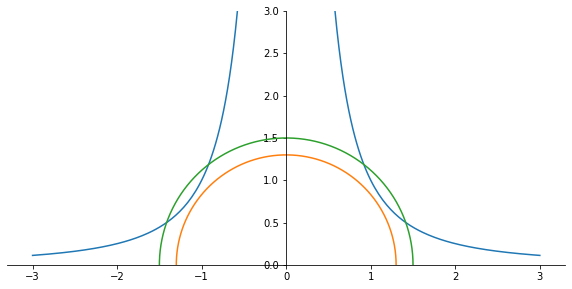

In [3]:
fig = plt.figure()
x = np.linspace(-3, 3, 256)
y = 1 / x**2
plt.ylim((0, 3))
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.set_aspect(1)
plt.plot(x, y)
theta = np.linspace(0, np.pi,800)
x,y = np.cos(theta)*1.3, np.sin(theta)*1.3
plt.plot(x, y)
x,y = np.cos(theta)*1.5, np.sin(theta)*1.5
plt.plot(x, y)

例如 上图的方程$f(x, y)=x^2y$, 想要得到其上的点与原点的最短距离, 一种方法是,以原点为圆形向外画圆,第一次与曲线相交的点就是距离原点最近的点.可以得到一个规划问题:$$\begin{align} & \mathop{min}_{x,y} f(x,y)= x^2 + y^2 \\ & s.t. g(x,y)=x^2y -3=0,\end{align} $$
分析得知:
- 在极值点, 圆与曲线相切
- 梯度与等高线的切线垂直

综合可知，在相切点，圆的梯度向量和曲线的**梯度向量平行**, 可以表示为:
$$\nabla f = \lambda \nabla g \tag 9$$
故而上述问题的可表示为:$$\begin{cases}
\begin{pmatrix} 2x \\2y \end{pmatrix} = \lambda \begin{pmatrix} 2xy \\x^2 \end{pmatrix}\\
x^2y=3\end{cases}$$
这就是拉格朗日乘子法

####  定义
拉格朗日乘子法(Lagrange multipliers)是一种寻找多元函数在一组约束下的极值的方法.通过引入**拉格朗日乘子**(如上述的$\lambda$),可将有d个变量与k个约束条件的最优化问题转为具有d+k个变量的无约束优化问题求解.假定x为d维向量,要寻找x的某个取值$x^*$,使目标函数f(x)最小且同时满足g(x) = 0的约束,从几何角度看,该问题的目标是在由方程
g(x)=0确定的d-1维曲面上寻找能使目标函数f(x)最小化的点,得出以下结论:
- 对于约束曲面上的任意点x, 该点的梯度$\nabla g(x)$正交(内积为0)于约束曲面;
- 对于最优点$x^*$, 目标函数在该点的梯度$\nabla f(x^*)$正交于约束曲面.

在最优点$x^*$, 梯度$\nabla g(x^*)$与$\nabla f(x^*)$的方向必定相同或相反, 即:
$$\nabla f(x^*) + \lambda \nabla g(x^*) = 0 \tag {10}$$

定义**拉格朗日函数**, $\lambda$称为拉格朗日乘子:
$$L(x,\lambda)= f(x) + \lambda g(x) \tag {11}$$
#### 无约束优化问题
考虑无约束优化问题：$$\mathop{min}_xf(x)$$根据 Fermat 定理，直接找到使目标函数得 0 的点即可 即 $\nabla_xf(x)=0$ ，如果没有解析解的话，可以使用梯度下降或牛顿方法等迭代的手段来使 x 沿负梯度方向逐步逼近极小值点
#### 等式约束优化
要求函数f 在g 约束下的极值这种问题可以表示为:
$$\begin{align} & \mathop {min}_x f(x) \\ & s.t. g_i(x)=0, \quad i=1,2,\dots,m\end{align} \tag {12}$$
可以列出方程组求解
$$\begin{cases} \nabla_x L(x, \lambda) = 0\\ \nabla_{\lambda} L(x, \lambda) = 0 \end{cases} \tag {13}$$
<img src='../img/等式约束和不等式约束.png'></img>
#### 不等式约束
当约束条件为$g(x)\leq0$,此时最优点$x^*$或在g(x)<0的区域中,或在边间g(x)=0上.
- 对于g(x)<0的情形,约束$g(x)  \leq 0$不起作用,可以直接通过条件$\nabla f(x) = 0$来获得最优点;这等价于将$\lambda$置零后对$\nabla_x L(x, \lambda)$置零得到最优点, 即 $\nabla_x L(x, 0) = \nabla f(x) = 0$.
- 对于g(x)=0的情形,类似等式约束的分析,此时$\nabla f(x^*)$与$\nabla g(x^*)$的方向必相反(相同的话最优点不可能在g(x)=0形成曲面内部), 即$\lambda > 0$

综合起来，必须满足$\lambda g(x)=0$, 这时候转化为：
$$\begin{cases}g(x) \leq 0; \\ \lambda \geq 0;\\ u_jg_j(x)=0\end{cases} \tag{14}$$
(14)式被称为**KKT条件**(Karush-Kuhn-Tucker).  
将其推广到具有m个等式约束和n个不等式约束的情形:
$$
\begin{align} &\mathop {min}_x f(x)\\
&s.t. &h_i(x)=0, \quad i=1,2,\dots,m\\
&& g_j(x) \leq 0,\quad j=1,2,\dots,n\end{align} \tag {15}
$$

定义**广义拉格朗日函数**:
$$L(x, \lambda, \mu) = f(x) + \sum_{i=1}^{m}\lambda_ih_i(x) + \sum_{j=1}^{n}\mu_jg_j(x) \tag {16}$$
它的KKT条件($j=1,2,\dots,n$)为:
$$\begin{cases}g_j(x) \leq 0; \\ u_j \geq 0; \\ u_jg_j(x)=0.\end{cases} \tag {17}$$

### 2.2 对偶问题
一个优化问题可以从两个角度进行考虑,"主问题"(primal problem)和"对偶问题"(dual problem).对主问题(15),其拉格朗日"**对偶函数**"(dual function)$\Gamma:\mathbb{R}^{m} \times \mathbb{R}^{n}$定义为:
$$
\begin{align}d^*=\Gamma(\lambda, \mu) &= \mathop{inf}_{x \in \mathbb{D}}L(x, \lambda, \mu) \\
& = \mathop{inf}_{x \in \mathbb{D}} \left(f(x) + \sum_{i=1}^{m}\lambda_ih_i(x) + \sum_{j=1}^{n}\mu_jg_j(x) \right).
\end{align} \tag {18}
$$
> 将拉格朗日函数$L(x, \lambda, \mu)对x求导并令导数为0, 来获得对偶函数的表达形式$

若令$\hat{x} \in \mathbb{D}$为满足式(15)的**可行域**中的点, 则对任意的$\mu \geq$(任意分量都为非负)和$\lambda$有
$$
\sum_{i=1}^{m}\lambda_ih_i(x) + \sum_{j=1}^{n}\mu_jg_j(x) \leq 0 \tag{19}
$$
进而有 
$$
d^*=\Gamma(\lambda, \mu) = \mathop{inf}_{x \in \mathbb{D}}L(x, \lambda, \mu) \leq
L(\hat{x}, \lambda, \mu) \leq f(\hat{x}) \tag {20}
$$
若主问题(15)取到的最优值为$p^*$,则对任意$\mu \geq 0$和$\lambda$都有:
$$
d^*=\Gamma(\lambda, \mu) \leq p^* \tag{21}
$$
对偶函数给出了主问题最优值的下界(不能比$\Gamma(\lambda, \mu)$小),**基于对偶函数能获得的最好下界**这个问题,提出优化问题:
$$
d^*=\mathop{max}_{\lambda, \mu}\Gamma(\lambda, \mu)=\mathop{max}_{\lambda, \mu}\mathop{min}_xL(x, \lambda, \mu)
\quad s.t. u_j \geq 0\quad  j=\{1,2,\dots,n\} \tag{22}
$$
式(22)就是式(15)的**对偶问题**, $\lambda$和$\mu$称为"对偶变量"(dual variable).无论主问题(15)的凸性如何, 对偶问题(22)始终是**凸优化问题**.  

$d^* \leq p^*$这称为"弱对偶"(**weak duality**), 若$d^* = p^*$, 则称为"强对偶"(**strong duality**)
它的kkt为:
$$\begin{cases}\nabla_xL(x,\lambda, \mu)=0 \\g_j(x) \leq 0; \\ u_j \geq 0; \\ u_jg_j(x)=0.\end{cases} \tag {23}$$
当满足KKT条件时，原始问题的最优化可以等价转化为对偶问题的最优化，而一般对偶问题要比原问题更好解决.  

对于一般的优化问题, 强对偶性通常不成立. 但是, 当主问题为凸优化问题, 即(15)式的f(x)和$g_j(x)$均为凸函数, $h_i(x)$为仿射函数, 且其可行域中至少有一点使不等式约数严格成立, 则此时强对偶性成立.  
强对偶性成立时, 拉格朗日函数分别对原变量(x)和对偶变量($\lambda, \mu$)求导, 再令导数等于零, 即可得到原变量与对偶变量的数值关系,由此解决对偶问题和主问题. 
> 仿射函数: 即由由1阶多项式构成的函数，一般形式为f(x) = Ax + b这里，A是一个m×k矩阵，x 是一个k向量，b是一个m向量，实际上反映了一种从k维到m维的空间映射关系

> 函数的凸性 :称函数f(x)(a<x<b)为下凸(或上凸)函数.若对任意的$x_1,x_2 \in (a, b)$:
$$f(\frac {x_1+x_2}{2}) \leq (或 \geq) \frac {f(x_1) + f(x_2)}{2}$$二阶导数是正数  

>凸集:  
若可行域X是一个**凸集**：即对于任给的$x,y \in X$总有实数$\lambda \in \mathbb{R}$$$\alpha x+(1−\alpha)y \in X,对于任意的\alpha \in(0,1) \tag{24}$$效果上，如果任何两点$x,y \in X$用直线相连，x,y之间线上的每个点都在X中，那么X是凸的。如果存在点不在X中，那么该集合是非凸的.

>凸函数:
若目标函数是一个凸函数：即$$f(\alpha x+(1−\alpha)y))\leq\alpha f(x)+(1−\alpha)f(y) \tag{25}$$
如果$x \ne y$,满足$$f(\alpha x+(1−\alpha)y)) < \alpha f(x)+(1−\alpha)f(y)$$ 那么称f(x)是**严格凸**的<br></br>
我们称这样的优化问题为凸优化问题。更加直观的去刻画该定义, 如果一个函数是一个凸函数，那么该函数两点的连线必然在该函数图形的上方.

回到式(7)给出的问题,引入拉格朗日乘子$\alpha$后的拉格朗日函数:
$$L(w, b, \alpha) = \frac 1 2 ||w||^2 + \sum_{i=1}^{m}\alpha_i(1-y_i(w^Tx_i+b)) \tag {26}$$
它的KKT条件为:
$$\begin{cases}\alpha_i \geq 0 \\y_i(w^Tx_i+b) -1 \geq 0 \\ \alpha_i(y_i(w^Tx_i+b) -1)=0 \end{cases} \tag{27}$$
令L对(w, b)求偏导并令其为零:
$$
\nabla_{w,b} L(w, b, \alpha) = \begin{pmatrix} \frac {\partial L}{\partial w} \\ 
\frac {\partial L}{\partial b}
\end{pmatrix} = \begin{pmatrix}w-\alpha_i\sum_{i=1}^{m} y_ix_i \\ \sum_{i=1}^{m}\alpha_iy_i\end{pmatrix}= \begin{pmatrix} 0 \\ 0\end{pmatrix} \tag {28}
$$
把式(28)带入式(26)中:
$$
\begin{align}L(w, b, \alpha) &=
\frac 1 2 \sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_jy_iy_j(x_i\cdot x_j) +
\sum_{i=1}^{m}\alpha_i - 
\sum_{i=1}^{m}\alpha_iy_i\left(\left(\sum_{j=1}^{m}\alpha_jy_jx_j\right) \cdot x_i + b\right) \\
&= -\frac {1} {2} \sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_jy_iy_j(x_i\cdot x_j) + \sum_{i=1}^{m}\alpha_i 
\end{align} \tag{29}
$$
这是后就获得对偶问题:
$$
\begin{align} & \mathop{max}_\alpha \mathop{min}_{w,b}L(w, b,\alpha) = 
\sum_{i=1}^{m}\alpha_i - \frac {1} {2} \sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_jy_iy_j(x_i\cdot x_j)\\
& s.t.\sum_{i=1}^{m}\alpha_iy_i = 0 \\ &\quad a_i \geq 0,\quad i=1,2,\cdots, m
\end{align} \tag{30}
$$
解出$\alpha$后, 求出w和b即可得到模型:
$$\begin{align}f(x) &= w^Tx+b \\ &= \sum_{i=1}^{m}\alpha_iy_ix_i^Tx +b \end{align} \tag {31}$$
同时式(27)可以改写为:
$$\begin{cases}\alpha_i \geq 0 \\y_if(x_i)-1 \geq 0 \\ \alpha_i(y_if(x_i) -1)=0 \end{cases} \tag{32}$$
于是, 任意的样本训练集中的$(x_i, y_i)$,总有$\alpha_i=0$或$y_if(x_i)-1=0$.
- 若$\alpha_i=0$, 则此样本$(x_i, y_i)$不会出现在式(31)的计算中;
- 若$\alpha_i > 0$, 则$y_if(x_i)=1$, 则样本$(x_i, y_i)$就处于在最大间隔边界上, 是一个支持向量.

这显示出支持向量机的一个重要性质:训练完成后, 大部分的训练样本都不需要保留, 最终模型只与支持向量有关

## SMO(Sequential Minimal Optimization)序列最小优化算法
- 思想: 是将大优化问题分解为多个小优化问题来求解. 先固定$\alpha_i$之外的所有参数,然后求$\alpha_i$上的极值
- 原理：每次循环选择一对个$\alpha_i和\alpha_j$进行优化处理，一旦找出一对合适的$\alpha$，那么就增大一个同时减少一个。
  * 这里指的合适必须要符合一定的条件:
    + 这两个$\alpha$必须要在间隔边界之外
    + 这两个$\alpha$还没有进行过区间化处理或者不在边界上。
  * 之所以要同时改变2个$\alpha$；原因是我们有一个约束条件： $\sum_{i=1}^{m} a_iy_i=0$；如果只是修改一个$\alpha$，很可能导致约束条件失效。